In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
data= pd.read_csv('Datasets\8_top-5000-youtube-channels.csv')

In [62]:
data.head(-5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
...,...,...,...,...,...,...
4990,"4,991st",B+,Ho Ngoc Ha's Official Channel,208,--,127185704
4991,"4,992nd",B+,Toys to Learn Colors,11,663114,141933264
4992,"4,993rd",B+,КАZКА,25,131766,74304638
4993,"4,994th",B+,United CUBE (CUBE Entertainment…,1055,1586835,371299166


In [63]:
data.tail(-5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
5,6th,A++,Movieclips,30243,17149705,16618094724
6,7th,A++,netd müzik,8500,11373567,23898730764
7,8th,A++,ABS-CBN Entertainment,100147,12149206,17202609850
8,9th,A++,Ryan ToysReview,1140,16082927,24518098041
9,10th,A++,Zee Marathi,74607,2841811,2591830307
...,...,...,...,...,...,...
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764


In [64]:
print('The number of rows is ',data.shape[0])
print('The number of columns is ',data.shape[1])

The number of rows is  5000
The number of columns is  6


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   object
 1   Grade          5000 non-null   object
 2   Channel name   5000 non-null   object
 3   Video Uploads  5000 non-null   object
 4   Subscribers    5000 non-null   object
 5   Video views    5000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [66]:
data.describe()

,Video views
count,5000.00
mean,1071449400.15
std,2003843972.12
min,75.00
25%,186232945.75
50%,482054780.00
75%,1124367826.75
max,47548839843.00


In [67]:
pd.options.display.float_format = '{:.2f}'.format

In [68]:
data.describe()

,Video views
count,5000.00
mean,1071449400.15
std,2003843972.12
min,75.00
25%,186232945.75
50%,482054780.00
75%,1124367826.75
max,47548839843.00


In [69]:
data = data.replace('--',np.nan,regex=True)

In [70]:
data.isnull().sum()

Rank               0
Grade              0
Channel name       0
Video Uploads      6
Subscribers      387
Video views        0
dtype: int64

In [71]:
per_missing = data.isnull().sum()*100/len(data)         
per_missing.index = per_missing.index.astype(str)

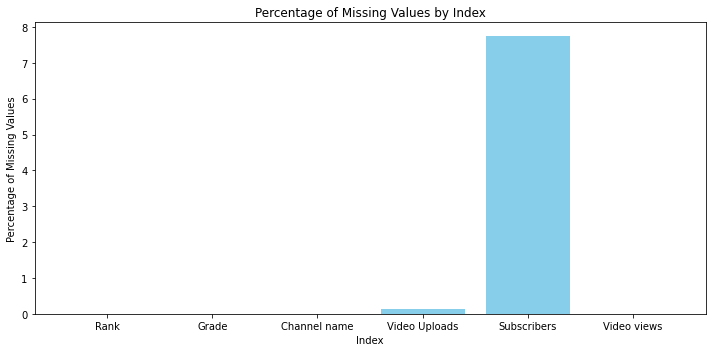

In [72]:
plt.figure(figsize=(10,5))
plt.bar(per_missing.index, per_missing.values, color='skyblue')
plt.xlabel('Index')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values by Index')
plt.tight_layout()

In [73]:
data.dropna(axis=0,inplace=True)

In [74]:
data.head(5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [75]:
data.dtypes

Rank             object
Grade            object
Channel name     object
Video Uploads    object
Subscribers      object
Video views       int64
dtype: object

As we can see that the rank column contains 'st' , 'nd' and ',' after the rank number. Hence it makes sense to remove these and then convert to int.

We're using the string slicing to pop the last 2 elements of every row in column Rank

In [76]:
data['Rank']=data['Rank'].str[:-2]

In [77]:
data['Rank'] = data['Rank'].str.replace(',','')

In [78]:
data['Rank'] = data['Rank'].astype(int)

In [79]:
data[['Video Uploads','Subscribers']]= data[['Video Uploads','Subscribers']].astype(int)

In [80]:
data.dtypes

Rank              int32
Grade            object
Channel name     object
Video Uploads     int32
Subscribers       int32
Video views       int64
dtype: object

In [81]:
data.Grade.value_counts()

B+      2722
A-       941
A        897
A+        40
A++       10
Name: Grade, dtype: int64

In [82]:
data['Grade'].unique()

array(['A++ ', 'A+ ', 'A ', 'A- ', 'B+ '], dtype=object)

In [83]:
data['Grade']=data['Grade'].map({'A++ ':5,'A+ ':4,'A ':3,'A- ':2,'B+ ':1})

In [84]:
data['Average Views'] = data['Video views']/data['Video Uploads']

In [85]:
data.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views', 'Average Views'],
      dtype='object')

In [86]:
channel_data = data.groupby('Channel name')['Average Views'].mean()

In [87]:
data.sort_values(by='Video Uploads',ascending=False)


,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Average Views
3453,3454,1,AP Archive,422326,746325,548619569,1299.04
1149,1150,2,YTN NEWS,355996,820108,1640347646,4607.77
2223,2224,1,SBS Drama,335521,1418619,1565758044,4666.65
323,324,3,GMA News,269065,2599175,2786949164,10357.90
2956,2957,1,MLB,267649,1434206,1329206392,4966.23
...,...,...,...,...,...,...,...
4100,4101,1,DenzelCurryVEVO,1,8012,25878252,25878252.00
2404,2405,1,ItsHARSH007 Gaming,1,23499,75,75.00
4474,4475,1,hyghhopes,1,15325,14842098,14842098.00
628,629,3,cocoz toon,1,2162992,333012122,333012122.00


In [88]:
data.corr()

,Rank,Grade,Video Uploads,Subscribers,Video views,Average Views
Rank,1.00,-0.87,-0.07,-0.38,-0.40,-0.15
Grade,-0.87,1.00,0.09,0.43,0.48,0.16
Video Uploads,-0.07,0.09,1.00,0.01,0.09,-0.06
Subscribers,-0.38,0.43,0.01,1.00,0.79,0.29
Video views,-0.40,0.48,0.09,0.79,1.00,0.29
Average Views,-0.15,0.16,-0.06,0.29,0.29,1.00


Bar plots are super essential for displaying relationships between categorical data and at least one numerical variable

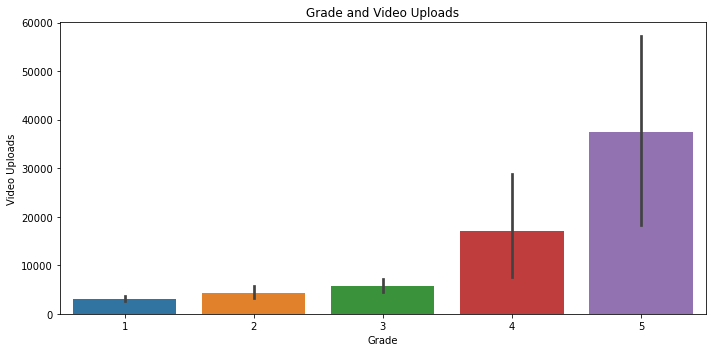

In [91]:
plt.figure(figsize=(10,5))
plt.title('Grade and Video Uploads')
sns.barplot(x='Grade',y='Video Uploads',data=data)
plt.tight_layout()

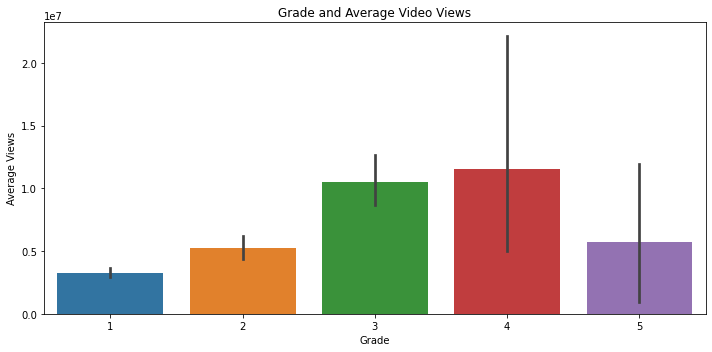

In [93]:
plt.figure(figsize=(10,5))
plt.title('Grade and Average Video Views')
sns.barplot(x='Grade',y='Average Views',data=data)
plt.tight_layout()

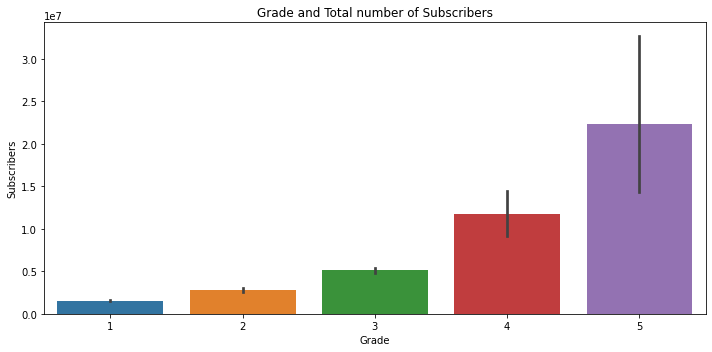

In [94]:
plt.figure(figsize=(10,5))
plt.title('Grade and Total number of Subscribers')
sns.barplot(x='Grade',y='Subscribers',data=data)
plt.tight_layout()

We can use the groupby function as well to solve for all of our above questions instead of using sns.

In [97]:
data.groupby('Grade').mean().sort_values(by='Video views',ascending=False)

,Rank,Video Uploads,Subscribers,Video views,Average Views
Grade,,,,,
5,5.50,37450.70,22281762.50,21199091192.80,5688267.96
4,31.32,16960.30,11726947.47,6168741772.73,11577080.32
3,534.29,5709.86,5107136.29,2497972949.11,10540908.45
2,1533.99,4382.58,2798520.38,1102450027.69,5254804.04
1,3520.54,3136.16,1535207.95,555183839.09,3280380.88
